## Momentum Based Strategy

### Momentum and Sentiment
* Momentum investing is among the most well-established factor strategies.
* The premise of stratefies using this factor is that asset prices exhibit a trend, reflected in positive serial correlation.

### How to measure momentum and sentiment
* Momentum factors are typically derived from changes in price time series by identifying trends and patterns. They can be constructed based on absolute or relative retun by comparing a cross-section of assets or analyszing on assets time series.
* Popular indicators 
    * RSI
    * Price Momentum
    * MACD
    * ATR - Average True Range
    * Stochastic Osicllattor
    * ROC (rate of change)
    * 12 moth price momentum Volume adjustment
        * this indicator normalizes the total return over the previous 12 months by dividing it by the SD of these returns
    * Price Acceleration
        * Price acceleration calculates the gradient of the price trend using a linear regression on daily prices for a longer and a shorter period, for example 1 yesr and 3 monts of trading days and compares the change in the slope as a measure of price acceleration
    * Percent off 52 week high 
        * this factor uses the percent difference between the most recent and the highest price for the the 52 weeks
    * Additional sentiment indicators include the following metrics analyst estimates, among others:
        * Earnings estimates count
            * This ranks stocks by the number of consensus estimates as a proxy for analyst coveerage and information uncertainity. A higher value is more desirable.
        * N-month change in recommendation
        * 12 month change in shares outstanding
        * 6monhth change in target price
        * Net earnings revisions
        * short intrest to shares outstanding
            * this measures the persc=centage of share outstanding currently being sold short,. Hence a high level of short intrest indicates negative sentiment and is expected to signal poor performance going forward.
        * there are numberous data providers that ai  to offer sentiment indicators constucted ofrom social media such as Twitter. 
        * Creating own sentiment indicators using NLP
        
### Volatility and size Anomalies
The lottery effect builds on empirical evidence that individuals take on bets that resemble
lottery tickets with a small expected loss but a large potential win, even though this large
win may have a fairly low probability. If investors perceive that the risk-return profile of a
low price, volatile stock is like a lottery ticket, then it could be an attractive bet. As a result,
investors may overpay for high-volatility stocks and underpay for low-volatility stocks due
to their biased preferences.
The representativeness bias suggests that investors extrapolate the success of a few,
well‑publicized volatile stocks to all volatile stocks while ignoring the speculative nature
of such stocks.
Investors may also be overconfident in their ability to forecast the future, and their
differences in opinions are higher for volatile stocks with more uncertain outcomes. Since it
is easier to express a positive view by going long—that is, owning an asset—than a negative
view by going short, optimists may outnumber pessimists and keep driving up the price of
volatile stocks, resulting in lower returns.

### How to measure volatility and size
* Metrics used to identify low-volatility stocks cover a broad spectrum, with realized volatility (standard deviation) on one end and forecast (implied) volatility and correlations on the other end. Some operationalize low volatility as low beta. The evidence in favor of the volatility anomaly appears robust for different metrics (Ang, 2014)

### Engineering Alpha factors that predict returns


### Alpha and Beta Definitions
In trading terminology, alpha and beta are two key concepts used to evaluate the performance and risk of an investment or a trading strategy in relation to the overall market.

1. Alpha:
Alpha represents the excess return earned by an investment or a trading strategy compared to the return of a benchmark or the overall market. It is a measure of the strategy's ability to generate positive returns independent of market movements. A positive alpha indicates that the investment or strategy outperformed the market, while a negative alpha indicates underperformance.

In mathematical terms, alpha is calculated using the following formula:
Alpha = Actual Return - (Risk-free Rate + Beta * Market Return)

A positive alpha suggests that the investment or strategy is adding value beyond what could be attributed to market movements alone, while a negative alpha suggests that the strategy is not performing well compared to the market.

2. Beta:
Beta measures the sensitivity of an investment or a trading strategy to market movements. It quantifies the degree to which the investment's price moves in relation to changes in the overall market. A beta of 1 means the investment moves in tandem with the market, a beta greater than 1 means it is more volatile than the market, and a beta less than 1 means it is less volatile.

In mathematical terms, beta is calculated by regressing the historical returns of the investment against the historical returns of the market index. A beta greater than 1 indicates that the investment tends to magnify market movements, while a beta less than 1 indicates that it is less volatile than the market.

Beta is often used as a risk measure. Investments with a beta greater than 1 are considered more risky because they have higher volatility and tend to experience larger price swings in response to market fluctuations. Conversely, investments with a beta less than 1 are considered less risky because they have lower volatility and may be more stable during market downturns.

Both alpha and beta are essential tools for investors and traders to assess the performance and risk characteristics of their investment strategies and to compare them to market benchmarks.

### French-Fama Factors 
* useed to estimate the exposure of assets to common risk factos using linear regression.
* The five Fama–French factors, namely market risk, size, value, operating profitability, and investment, have been shown empirically to explain asset returns.

### Using Ta-Lib to create Technical alpha factors

### Denoising Alpha factos with the Kalman filter 
* how to apply a kalman filter using pykalman

### The Information coeffiencient
This leads to the information ratio (IR), which measures the average excess return per
unit of risk taken by dividing alpha by the tracking risk. When the benchmark is the risk-
free rate, the IR corresponds to the well-known Sharpe ratio, and we will highlight crucial
statistical measurement issues that arise in the typical case when returns are not normally
distributed. We will also explain the fundamental law of active management, which breaks
the IR down into a combination of forecasting skill and a strategy's ability to effectively
leverage these forecasting skills.
The goal of alpha factors is the accurate directional prediction of future returns. Hence, a
natural performance measure is the correlation between an alpha factor's predictions and
the forward returns of the target assets.
It is better to use the non-parametric Spearman rank correlation coefficient, which measures
how well the relationship between two variables can be described using a monotonic
function, as opposed to the Pearson correlation, which measures the strength of a
linear relationship
We can obtain the information coefficient (IC) using Alphalens, which relies on scipy.
stats.spearmanr under the hood (see the repo for an example of how to use scipy directly
to obtain p-values).

In [1]:
import backtrader as bt
import yfinance as yf

class MomentumVolatilityStrategy(bt.Strategy):
    params = (
        ('atr_period', 14),     # ATR period for measuring volatility
        ('rsi_period', 5),     # RSI period for measuring momentum
        ('rsi_oversold', 15),   # RSI oversold threshold (buy signal)
        ('rsi_overbought', 70), # RSI overbought threshold (sell signal)
        ('trailing_stop_percent', 0.05),  # Trailing stop percentage for exit
    )

    def __init__(self):
        self.atr = bt.indicators.ATR(self.data, period=self.params.atr_period)
        self.rsi = bt.indicators.RSI(self.data, period=self.params.rsi_period)
        self.trailing_stop_percent = self.params.trailing_stop_percent  # Store the trailing stop percent
        self.trailing_stop = None  # Store the trailing stop price
        self.total_trades = 0
        self.winning_trades = 0
        self.isPosition = False
        self.entry_price = 0

    def next(self):
        # Calculate the volatility of the current bar
        current_volatility = self.atr[0]
        avg_volatility = sum([self.atr[i] for i in range(-1, -7,-1)]) / 6
        if current_volatility > avg_volatility:
            # Check the momentum (RSI) for buy/sell signals
            if not self.isPosition:
                if self.rsi[0] < self.params.rsi_oversold:
                    print(f"current_volatitlity: {current_volatility}, avg_volatility: {avg_volatility}")
                    self.buy()
                    self.isPosition = True
                    self.entry_price = self.data.close[0]
                    self.trailing_stop = self.entry_price * (1.0 - self.trailing_stop_percent)  # Set initial trailing stop
                    print(f"Buying now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()}")
            else:
                if self.rsi[0] > self.params.rsi_overbought or self.data.close[0] < self.trailing_stop:
                    self.sell()
                    self.isPosition = False
                    self.trailing_stop = None
                    print(f"Selling now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()}")

    def get_metrics(self):
        # Calculate strategy performance metrics
        win_rate = (self.winning_trades / self.total_trades) * 100 if self.total_trades > 0 else 0
        return {
            'Total Trades': self.total_trades,
            'Winning Trades': self.winning_trades,
            'Win Rate': win_rate
        }

    def stop(self):
        metrics = self.get_metrics()
        print(f"Ending Portfolio Value: {self.broker.getvalue():.2f}")
        print("Performance Metrics:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.2f}%")

    def notify_trade(self, trade):
        if trade.isclosed:
            if trade.pnl > 0:
                self.winning_trades += 1
            self.total_trades += 1


[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
current_volatitlity: 247.68507324145332, avg_volatility: 210.17899020722962
Buying now at 17149.099609375 on 2022-01-24
Selling now at 16247.9501953125 on 2022-02-24
current_volatitlity: 286.0417278629405, avg_volatility: 283.7831343319042
Buying now at 16167.099609375 on 2022-05-11
Selling now at 15293.5 on 2022-06-17
current_volatitlity: 238.24107328064446, avg_volatility: 231.5696993898888
Buying now at 16858.599609375 on 2022-09-28
Selling now at 18349.69921875 on 2022-11-11
current_volatitlity: 197.898461884016, avg_volatility: 173.13413683569914
Buying now at 17806.80078125 on 2022-12-23
Selling now at 17359.75 on 2023-03-31
Ending Portfolio Value: 99672.35
Performance Metrics:
Total Trades: 4.00%
Winning Trades: 1.00%
Win Rate: 25.00%


<IPython.core.display.Javascript object>


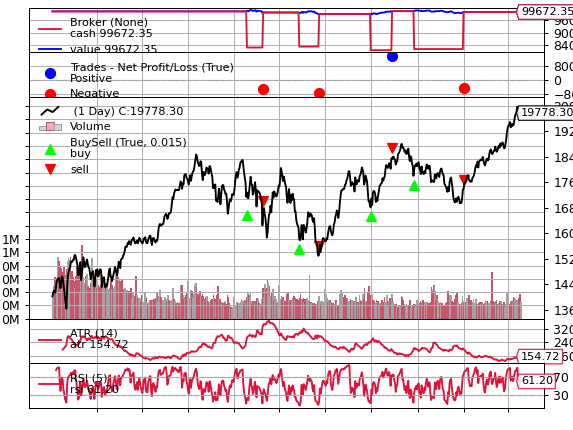

Ending Portfolio Value: 99672.35


In [3]:
if __name__ == '__main__':
    cerebro = bt.Cerebro()

    # Add your desired cash amount here (defaulting to 10000)
    start_cash = 100000
    cerebro.broker.set_cash(start_cash)

    # Add the data feed
    data = yf.download('^NSEI', start='2021-01-01', end='2023-07-27')
    data = bt.feeds.PandasData(dataname=data)

    cerebro.adddata(data)
    cerebro.addstrategy(MomentumVolatilityStrategy)

    # Set the commission to simulate realistic trading costs
    cerebro.broker.setcommission(commission=0.001)

    print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')

    # Add analyzers to plot entry and exit points
    cerebro.addanalyzer(bt.analyzers.Transactions, _name='transactions')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='trade_analyzer')

    # Run the strategy
    results = cerebro.run()
    cerebro.plot()

    # Print the final portfolio value
    print(f'Ending Portfolio Value: {cerebro.broker.getvalue():.2f}')


In [31]:
import backtrader as bt
import yfinance as yf

class VolatilityBreakoutStrategy(bt.Strategy):
    params = (
        ('atr_period', 14),     # ATR period for measuring volatility
        ('rsi_period', 14),     # RSI period for measuring momentum
        ('rsi_overbought', 70), # RSI overbought threshold (sell signal)
    )

    def __init__(self):
        self.atr = bt.indicators.ATR(self.data, period=self.params.atr_period)
        self.rsi = bt.indicators.RSI(self.data, period=self.params.rsi_period)
        self.bollinger = bt.indicators.BollingerBands(self.data, period=20, devfactor=2.0)

    def next(self):
        # Calculate the volatility of the current bar
        current_volatility = self.atr[0]
        avg_volatility = sum([self.atr[i] for i in range(-1, -7,-1)]) / 6
        if current_volatility > avg_volatility:
            # Check the RSI for overbought condition and Bollinger Bands for breakout
            if not self.position and self.rsi[0] > 50 and self.data.close[0] > self.bollinger.lines.bot[0]:
                self.buy()
                print(f"Buying now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()}")
            elif self.position and self.rsi[0] > self.params.rsi_overbought:
                self.sell()
                print(f"Selling now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()}")

    def get_metrics(self):
        total_trades = len(self)
        if total_trades == 0:
            return None
        winning_trades = sum([t.pnlcomm for t in self.trades if t.pnlcomm > 0])
        win_rate = (winning_trades / total_trades) * 100
        return {'Total Trades': total_trades, 'Winning Trades': winning_trades, 'Win Rate': win_rate}





[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
Buying now at 532.2999877929688 on 2022-02-01
Selling now at 539.7999877929688 on 2022-02-02
Buying now at 540.0999755859375 on 2022-02-03
Selling now at 508.6000061035156 on 2022-07-20
Buying now at 512.0499877929688 on 2022-07-21
Selling now at 528.2000122070312 on 2022-07-27
Buying now at 532.4500122070312 on 2022-07-28
Selling now at 528.3499755859375 on 2022-07-29
Buying now at 533.75 on 2022-08-01
Selling now at 542.0999755859375 on 2022-08-02
Buying now at 540.8499755859375 on 2022-08-03
Selling now at 571.75 on 2022-09-14
Buying now at 572.1500244140625 on 2022-09-15
Selling now at 614.1500244140625 on 2022-11-07
Buying now at 615.5499877929688 on 2022-11-09
Ending Portfolio Value: 100073.30


<IPython.core.display.Javascript object>


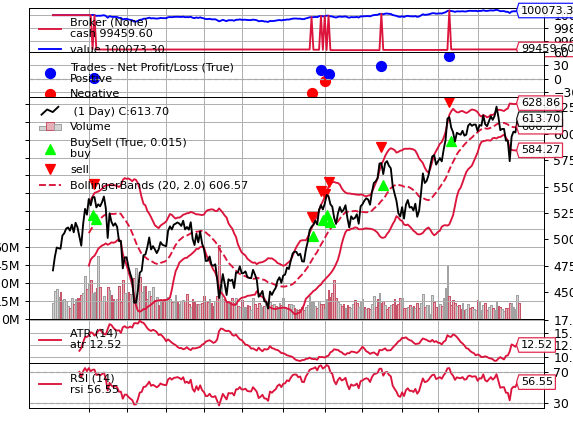

[[<Figure size 640x480 with 6 Axes>]]

In [33]:
cerebro = bt.Cerebro()

# Add your desired cash amount here (defaulting to 10000)
start_cash = 100000
cerebro.broker.set_cash(start_cash)

# Add the data feed
data = yf.download('sbin.ns', start='2022-01-01', end='2022-12-31')
data = bt.feeds.PandasData(dataname=data)

cerebro.adddata(data)
cerebro.addstrategy(VolatilityBreakoutStrategy)

print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')

# Run the strategy
results = cerebro.run()

# Print the final portfolio value
print(f'Ending Portfolio Value: {cerebro.broker.getvalue():.2f}')

cerebro.plot()



[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
Buying now at 362.0 on 2022-03-11
Selling now at 361.0 on 2022-05-05
Buying now at 321.29998779296875 on 2022-07-06
Selling now at 315.8999938964844 on 2022-07-11
Buying now at 335.1499938964844 on 2022-08-02
Selling now at 325.6499938964844 on 2022-08-08
Buying now at 328.29998779296875 on 2022-08-10
Selling now at 353.1499938964844 on 2022-08-17
Buying now at 347.04998779296875 on 2022-08-18
Selling now at 338.25 on 2022-08-19
Buying now at 333.6499938964844 on 2022-08-22
Selling now at 321.95001220703125 on 2022-09-02
Buying now at 339.8500061035156 on 2022-09-08
Selling now at 321.29998779296875 on 2022-09-16
Buying now at 306.8500061035156 on 2022-11-09
Selling now at 340.75 on 2022-11-28
Buying now at 339.04998779296875 on 2022-11-29
Selling now at 341.1499938964844 on 2022-11-30
Buying now at 338.6000061035156 on 2022-12-01
Selling now at 341.1000061035156 on 2022-12-02
Buyin

<IPython.core.display.Javascript object>


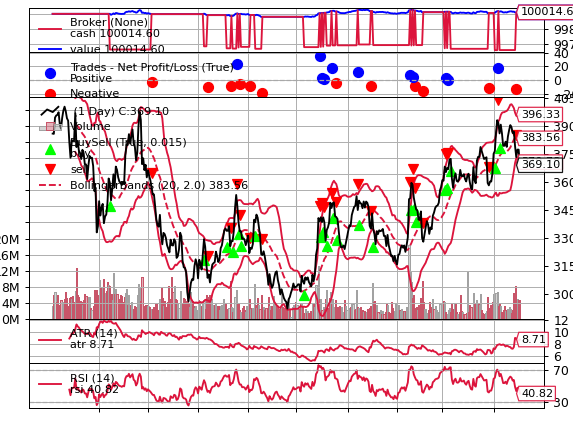

In [77]:
import backtrader as bt
import yfinance as yf

class VolatilityBreakoutStrategy(bt.Strategy):
    params = (
        ('atr_period', 14),     # ATR period for measuring volatility
        ('rsi_period', 14),     # RSI period for measuring momentum
        ('rsi_overbought', 70), # RSI overbought threshold (sell signal)
        ('trailing_stop_percent', 0.02),  # Trailing stop percentage for exit
    )

    def __init__(self):
        self.atr = bt.indicators.ATR(self.data, period=self.params.atr_period)
        self.rsi = bt.indicators.RSI(self.data, period=self.params.rsi_period)
        self.bollinger = bt.indicators.BollingerBands(self.data, period=20, devfactor=2.0)
        self.trailing_stop_percent = self.params.trailing_stop_percent
        self.trailing_stop = None
        self.total_trades = 0
        self.winning_trades = 0
        self.buying_price = 0

    def next(self):
        # Calculate the volatility of the current bar
        current_volatility = self.atr[0]
        avg_volatility = sum([self.atr[i] for i in range(-1, -7,-1)]) / 6
        if current_volatility > avg_volatility:
            if not self.position and self.rsi[0] > 50 and self.data.close[0] > self.bollinger.lines.bot[0]:
                self.buy()
                self.buying_price = self.data.close[0]
                self.trailing_stop = self.data.close[-1] * (1.0 - self.trailing_stop_percent)
                print(f"Buying now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()}")
            elif self.position:
                if self.data.close[0] > self.trailing_stop:
                    self.trailing_stop = self.data.close[0] * (1.0 - self.trailing_stop_percent)
                if self.rsi[0] > self.params.rsi_overbought or self.data.close[0] < min(self.trailing_stop,self.buying_price) :
                    self.sell()
                    self.total_trades += 1
                    if self.data.close[0] > self.buying_price:
                        self.winning_trades+=1
                    print(f"Selling now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()}")

    def get_metrics(self):
        print(f"Winning Trades : {self.winning_trades} | Total Trades: {self.total_trades}")
        print(f"WinRate: {self.winning_trades/self.total_trades * 100} %")


if __name__ == '__main__':
    cerebro = bt.Cerebro()

    # Add your desired cash amount here (defaulting to 10000)
    start_cash = 100000
    cerebro.broker.set_cash(start_cash)

    # Add the data feed
    data = yf.download('bpcl.ns', start='2022-01-01', end='2023-08-03')
    data = bt.feeds.PandasData(dataname=data)

    cerebro.adddata(data)
    cerebro.addstrategy(VolatilityBreakoutStrategy)

    print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')

    # Run the strategy
    results = cerebro.run()

    # Print the final portfolio value
    print(f'Ending Portfolio Value: {cerebro.broker.getvalue():.2f}')
    
    cerebro.plot()


In [78]:
results[0].get_metrics()

Winning Trades : 11 | Total Trades: 23
WinRate: 47.82608695652174 %


[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
Buying now at 1491.6500244140625 on 2022-07-06
84.38147216569226
Selling now at 1544.949951171875 on 2022-09-13
Buying now at 1451.199951171875 on 2022-10-07
79.79821792185115
Selling now at 1585.300048828125 on 2022-11-14
Buying now at 1605.5 on 2022-12-07
21.67487948842711
Selling now at 1569.300048828125 on 2022-12-09
Buying now at 1540.5 on 2022-12-15
43.4553474153826
Selling now at 1510.1500244140625 on 2022-12-28
Ending Portfolio Value: 100068.95


<IPython.core.display.Javascript object>


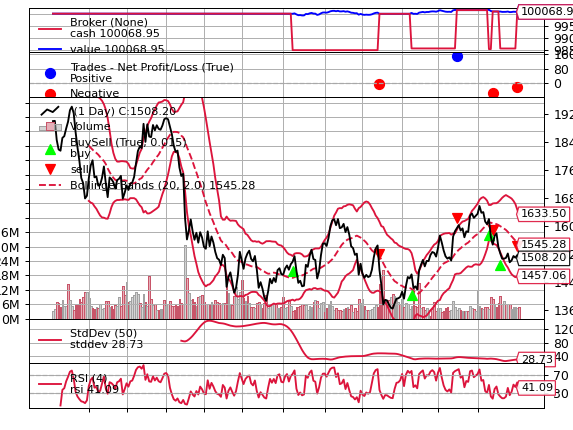

In [128]:
import backtrader as bt
import yfinance as yf

class VolatilityBreakoutStrategy(bt.Strategy):
    params = (
        ('bbands_period', 20),        # Bollinger Bands period
        ('bbands_devfactor', 2.0),    # Bollinger Bands deviation factor
        ('volatility_window', 50),    # Window for calculating volatility threshold
        ('trailing_stop_percent', 0.01),  # Trailing stop percentage for exit
        ('rsi_period', 4)
    )

    def __init__(self):
        self.bbands = bt.indicators.BollingerBands(self.data.close, period=self.params.bbands_period, devfactor=self.params.bbands_devfactor)
        self.trailing_stop_percent = self.params.trailing_stop_percent
        self.trailing_stop = None
        self.band_widths = bt.indicators.StdDev(self.bbands.lines.bot - self.bbands.lines.top, period=self.params.volatility_window)
        self.buying_price = 1000000
        self.rsi = bt.indicators.RSI(self.data, period=self.params.rsi_period)
    def next(self):
        avg_band_width = sum([self.band_widths[i] for i in range(-1, -self.params.volatility_window - 1, -1)]) / self.params.volatility_window
        avg_volume = sum([self.data.volume[i] for i in range(-1, -5, -1)]) / 5

        if self.band_widths[0] <= 0.9 * avg_band_width :#and avg_volume > self.data.volume[0]: 
            if not self.position:
                self.buy()
                self.buying_price =self.data.close[0]
                self.trailing_stop = self.data.close[-1] * (1.0 - self.trailing_stop_percent)
                print(f"Buying now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()}")
        elif self.position:
            if self.data.close[0] > self.trailing_stop:
                self.trailing_stop = self.data.close[0] * (1.0 - self.trailing_stop_percent)
            if self.data.close[0] <  max(self.trailing_stop,self.buying_price - 0.02*self.buying_price) or self.rsi[0] > 50:
                print(self.rsi[0])
                self.sell()
                print(f"Selling now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()}")

    def get_metrics(self):
        total_trades = len(self)
        if total_trades == 0:
            return None
        winning_trades = sum([t.pnlcomm for t in self.trades if t.pnlcomm > 0])
        win_rate = (winning_trades / total_trades) * 100
        return {'Total Trades': total_trades, 'Winning Trades': winning_trades, 'Win Rate': win_rate}

if __name__ == '__main__':
    cerebro = bt.Cerebro()

    # Add your desired cash amount here (defaulting to 10000)
    start_cash = 100000
    cerebro.broker.set_cash(start_cash)

    # Add the data feed
    data = yf.download('infy.NS', start='2022-01-01', end='2022-12-31')
    data = bt.feeds.PandasData(dataname=data)

    cerebro.adddata(data)
    cerebro.addstrategy(VolatilityBreakoutStrategy)

    print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')

    # Run the strategy
    results = cerebro.run()

    # Print the final portfolio value
    print(f'Ending Portfolio Value: {cerebro.broker.getvalue():.2f}')
    
    cerebro.plot()




[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
Buying now at 429.6000061035156 on 2022-05-27
Buying now at 442.3999938964844 on 2022-05-30
Buying now at 443.54998779296875 on 2022-05-31
Buying now at 444.6000061035156 on 2022-06-01
Buying now at 439.1499938964844 on 2022-06-02
Buying now at 431.8999938964844 on 2022-06-03
Buying now at 432.3500061035156 on 2022-06-06
Buying now at 435.8500061035156 on 2022-06-07
Buying now at 435.6499938964844 on 2022-06-08
Buying now at 428.5 on 2022-06-09
Buying now at 428.04998779296875 on 2022-06-10
Buying now at 406.70001220703125 on 2022-06-13
Buying now at 405.1499938964844 on 2022-06-14
Buying now at 414.1000061035156 on 2022-06-15
Buying now at 392.95001220703125 on 2022-06-16
Buying now at 388.95001220703125 on 2022-06-17
Buying now at 382.70001220703125 on 2022-06-20
Buying now at 397.6000061035156 on 2022-06-21
Buying now at 393.1000061035156 on 2022-06-22
Buying now at 407.200012207

<IPython.core.display.Javascript object>


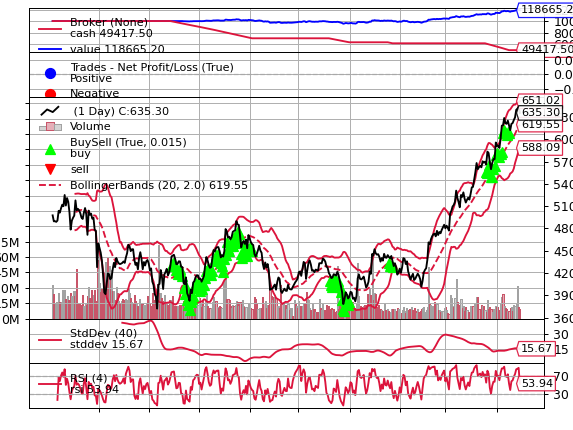

In [149]:
import backtrader as bt
import yfinance as yf

class VolatilityBreakoutStrategy(bt.Strategy):
    params = (
        ('bbands_period', 20),        # Bollinger Bands period
        ('bbands_devfactor', 2.0),    # Bollinger Bands deviation factor
        ('volatility_window', 40),    # Window for calculating volatility threshold
        ('trailing_stop_percent', 0.01),  # Trailing stop percentage for exit
        ('rsi_period', 4),
        ('rsi_oversold', 30),
        ('rsi_overbought', 70)
    )

    def __init__(self):
        self.bbands = bt.indicators.BollingerBands(self.data.close, period=self.params.bbands_period, devfactor=self.params.bbands_devfactor)
        self.trailing_stop_percent = self.params.trailing_stop_percent
        self.trailing_stop = None
        self.band_widths = bt.indicators.StdDev(self.bbands.lines.bot - self.bbands.lines.top, period=self.params.volatility_window)
        self.buying_price = 1000000
        self.rsi = bt.indicators.RSI(self.data, period=self.params.rsi_period)
        self.total_trades = 0
        self.winning_trades = 0
        
    def next(self):
        avg_band_width = sum([self.band_widths[i] for i in range(-1, -self.params.volatility_window - 1, -1)]) / self.params.volatility_window

        if self.band_widths[0] <= 0.8 * avg_band_width:
            if True:#not self.position:
                self.buy()
                self.buying_price = self.data.close[0]
                self.trailing_stop = self.buying_price * (1.0 - self.trailing_stop_percent)
                print(f"Buying now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()}")
        elif False :#self.position:
            if self.data.close[0] > self.trailing_stop:
                self.trailing_stop = self.data.close[0] * (1.0 - self.trailing_stop_percent)
            if self.data.close[0] < self.bbands.lines.bot[0] or self.rsi[0] > self.params.rsi_overbought or self.data.close[0] < self.trailing_stop:
                self.sell()
                self.total_trades += 1
                if(self.buying_price < self.data.close[0]):
                    self.winning_trades+=1
                print(f"Selling now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()}")

    def get_metrics(self):
        pass
#         print(f"Winning Trades : {self.winning_trades} | Total Trades: {self.total_trades}")
#         print(f"WinRate: {self.winning_trades/self.total_trades * 100} %")

if __name__ == '__main__':
    cerebro = bt.Cerebro()

    # Add your desired cash amount here (defaulting to 10000)
    start_cash = 100000
    cerebro.broker.set_cash(start_cash)

    # Add the data feed
    data = yf.download('tatamotors.NS', start='2022-01-01', end='2023-07-31')
    data = bt.feeds.PandasData(dataname=data)

    cerebro.adddata(data)
    cerebro.addstrategy(VolatilityBreakoutStrategy)

    print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')

    # Run the strategy
    results = cerebro.run()
    print(results[0].get_metrics())

    # Print the final portfolio value
    print(f'Ending Portfolio Value: {cerebro.broker.getvalue():.2f}')
    
    cerebro.plot()


## Training a ML for the same results

In [150]:
import yfinance as yf
import pandas as pd

def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

def preprocess_data(data):
    # Apply differencing to make the data stationary
    data['CloseDiff'] = data['Close'].diff()

    # Handle missing values by forward filling
    data.fillna(method='ffill', inplace=True)

    return data



[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  127.503639   
2021-01-05  128.889999  131.740005  128.429993  131.009995  129.080078   
2021-01-06  127.720001  131.050003  126.379997  126.599998  124.735031   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.991379   
2021-01-08  132.429993  132.630005  130.229996  132.050003  130.104767   

               Volume  CloseDiff  
Date                              
2021-01-04  143301900        NaN  
2021-01-05   97664900   1.599991  
2021-01-06  155088000  -4.409996  
2021-01-07  109578200   4.320000  
2021-01-08  105158200   1.130005  


In [155]:
symbol = '^nSei'  # Replace with your desired stock symbol
start_date = '2021-01-01'
end_date = '2022-01-01'

# Fetch and preprocess data
stock_data = fetch_stock_data(symbol, start_date, end_date)
preprocessed_data = preprocess_data(stock_data)

preprocessed_data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,CloseDiff
Date,,,,,,,
2021-01-01,13996.099609,14049.849609,13991.349609,14018.500000,14018.500000,358100,NaN
2021-01-04,14104.349609,14147.950195,13953.750000,14132.900391,14132.900391,495000,114.400391
2021-01-05,14075.150391,14215.599609,14048.150391,14199.500000,14199.500000,492500,66.599609
2021-01-06,14240.950195,14244.150391,14039.900391,14146.250000,14146.250000,632300,-53.250000
2021-01-07,14253.750000,14256.250000,14123.099609,14137.349609,14137.349609,559200,-8.900391


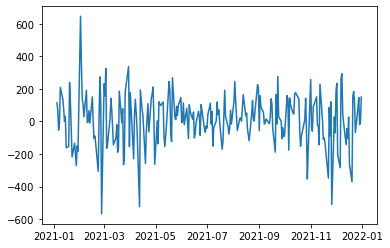

In [157]:
plt.plot(preprocessed_data.CloseDiff)

In [158]:
import yfinance as yf
import pandas as pd
import numpy as np
import talib
from sklearn.model_selection import train_test_split

# Step 1: Data Collection and Preprocessing

def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

def preprocess_data(data):
    data['CloseDiff'] = data['Close'].diff()
    data.fillna(method='ffill', inplace=True)
    return data

# Step 2: Feature Generation

def generate_technical_indicators(data):
    data['SMA'] = talib.SMA(data['Close'], timeperiod=14)
    data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
    upper_band, middle_band, lower_band = talib.BBANDS(data['Close'], timeperiod=20)
    data['BB_upper'] = upper_band
    data['BB_lower'] = lower_band
    # Add more technical indicators from talib
    return data

# Step 3: Label Generation

def generate_labels(data, period, threshold):
    data['FutureClose'] = data['Close'].shift(-period)
    data['PriceChange'] = (data['FutureClose'] - data['Close']) / data['Close']
    data['Label'] = np.where(data['PriceChange'] >= threshold, 1, 0)
    return data

if __name__ == '__main__':
    symbol = 'AAPL'  # Replace with your desired stock symbol
    start_date = '2021-01-01'
    end_date = '2022-01-01'
    period = 5  # Number of days into the future
    threshold = 0.02  # Price change threshold

    # Fetch and preprocess data
    stock_data = fetch_stock_data(symbol, start_date, end_date)
    preprocessed_data = preprocess_data(stock_data)

    # Generate technical indicators
    data_with_indicators = generate_technical_indicators(preprocessed_data)

    # Generate labels
    labeled_data = generate_labels(data_with_indicators, period, threshold)

    print(labeled_data.head())


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  127.503647   
2021-01-05  128.889999  131.740005  128.429993  131.009995  129.080048   
2021-01-06  127.720001  131.050003  126.379997  126.599998  124.735023   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.991394   
2021-01-08  132.429993  132.630005  130.229996  132.050003  130.104767   

               Volume  CloseDiff  SMA  RSI  BB_upper  BB_lower  FutureClose  \
Date                                                                          
2021-01-04  143301900        NaN  NaN  NaN       NaN       NaN   128.979996   
2021-01-05   97664900   1.599991  NaN  NaN       NaN       NaN   128.800003   
2021-01-06  155088000  -4.409996  NaN  NaN       NaN       NaN   130.889999   
2021-01-07  10957

In [159]:
from sklearn.ensemble import RandomForestClassifier

def train_random_forest(X_train, y_train):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model


In [164]:
def train_test_split_data(data, features, label):
    data = data.dropna()
    X = data[features]
    y = data[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

if __name__ == '__main__':
    # ... (previous code)

    # Select features and label for training
    features = ['SMA', 'RSI', 'BB_upper', 'BB_lower']  # Add more features here
    label = 'Label'

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split_data(labeled_data, features, label)

    # Train a Random Forest model
    rf_model = train_random_forest(X_train, y_train)


252


In [165]:
from sklearn.model_selection import GridSearchCV

def grid_search_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_


In [198]:
def evaluate_model(model, X_test, y_test):
    accuracy = model.score(X_test, y_test)
    # You can add more evaluation metrics here
    return accuracy


# doing grid search for finding the best model man
# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for Random Forest
best_rf_model = grid_search_model(rf_model, rf_param_grid, X_train, y_train)

# Evaluate the best model
rf_accuracy = evaluate_model(best_rf_model, X_test, y_test)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
# exporting the model
joblib.dump(best_rf_model, 'trained_model.pkl')

Random Forest Accuracy: 0.78


['trained_model.pkl']

In [200]:
import backtrader as bt
import yfinance as yf
from sklearn.externals import joblib  # or import joblib for scikit-learn >= 0.21

class MLBasedStrategy(bt.Strategy):
    def __init__(self):
        # Load the trained machine learning model
        self.model = joblib.load('trained_model.pkl')

    def next(self):
        # Calculate the same set of features used for model training
        features = self.calculate_features()

        # Get the model's prediction
        prediction = self.model.predict([features])

        # Other conditions (e.g., technical indicators)
        rsi = self.rsi[0]
        # ... other indicators and conditions ...

        # Decision-making based on the prediction and conditions
        if prediction == 1 and rsi > 50:
            self.buy()
        elif prediction == 0 and rsi < 30:
            self.sell()

    def calculate_features(self):
        
        # Calculate and return the features for the current data point
        # Make sure the features match the format used during model training
        # ...
        pass
        

if __name__ == '__main__':
    cerebro = bt.Cerebro()

    # Add your desired cash amount here (defaulting to 10000)
    start_cash = 100000
    cerebro.broker.set_cash(start_cash)

    # Add the data feed
    data = yf.download('AAPL', start='2022-01-01', end='2022-12-31')
    data = bt.feeds.PandasData(dataname=data)

    cerebro.adddata(data)
    cerebro.addstrategy(MLBasedStrategy)

    print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')

    # Run the strategy
    results = cerebro.run()

    # Print the final portfolio value
    print(f'Ending Portfolio Value: {cerebro.broker.getvalue():.2f}')

    cerebro.plot()


IndentationError: expected an indented block after function definition on line 27 (1498943870.py, line 33)

[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
Buying now at 171.66000366210938 on 2022-02-07
Selling now at 164.85000610351562 on 2022-02-25
Buying now at 165.1199951171875 on 2022-02-28
Selling now at 156.77000427246094 on 2022-05-05
Buying now at 152.05999755859375 on 2022-05-09
Selling now at 145.3800048828125 on 2022-06-03
Buying now at 137.1300048828125 on 2022-06-10
Ending Portfolio Value: 99971.21


<IPython.core.display.Javascript object>


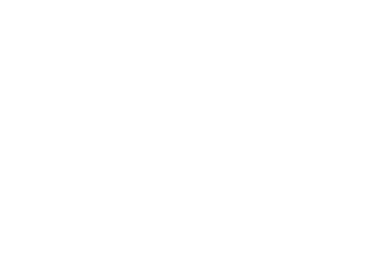

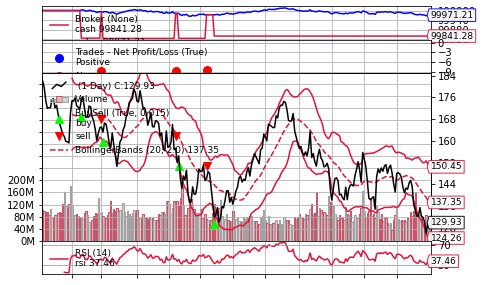

In [203]:
import backtrader as bt
import yfinance as yf

class VolatilityExpansionBreakoutStrategy(bt.Strategy):
    params = (
        ('bbands_period', 20),        # Bollinger Bands period
        ('bbands_devfactor', 2.0),    # Bollinger Bands deviation factor
        ('rsi_period', 14),           # RSI period
        ('rsi_oversold', 30),         # RSI oversold threshold (buy signal)
        ('trailing_stop_percent', 0.03),  # Trailing stop percentage for exit
    )

    def __init__(self):
        self.bbands = bt.indicators.BollingerBands(self.data.close, period=self.params.bbands_period, devfactor=self.params.bbands_devfactor)
        self.trailing_stop_percent = self.params.trailing_stop_percent
        self.trailing_stop = None
        self.rsi = bt.indicators.RSI(self.data, period=self.params.rsi_period)
        self.winning_trades = 0
        self.total_trades = 0
        self.buying_price = 10000000

    def next(self):
        # Calculate the volatility of the current bar
        current_volatility = self.bbands.lines.bot[0] - self.bbands.lines.top[0]
        avg_volatility = sum([self.bbands.lines.bot[i] - self.bbands.lines.top[i] for i in range(-1, -6, -1)]) / 5

        if current_volatility < 0.9 * avg_volatility:
            if not self.position and self.rsi[0] > self.params.rsi_oversold:
                self.buy()
                self.buying_price = self.data.close[0]
                self.trailing_stop = self.data.close[0] * (1.0 - self.trailing_stop_percent)
                print(f"Buying now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()}")
        else:
            if self.position and self.data.close[0] < self.trailing_stop:
                self.sell()
                self.total_trades+=1
                if(self.data.close[0]>self.buying_price):
                    self.winning_trades += 1
                print(f"Selling now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()}")

    def get_metrics(self):
        total_trades = len(self)
        if total_trades == 0:
            return None
        winning_trades = sum([t.pnlcomm for t in self.trades if t.pnlcomm > 0])
        win_rate = (winning_trades / total_trades) * 100
        return {'Total Trades': total_trades, 'Winning Trades': winning_trades, 'Win Rate': win_rate}

if __name__ == '__main__':
    cerebro = bt.Cerebro()

    # Add your desired cash amount here (defaulting to 10000)
    start_cash = 100000
    cerebro.broker.set_cash(start_cash)

    # Add the data feed
    data = yf.download('AAPL', start='2022-01-01', end='2022-12-31')
    data = bt.feeds.PandasData(dataname=data)

    cerebro.adddata(data)
    cerebro.addstrategy(VolatilityExpansionBreakoutStrategy)

    print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')

    # Run the strategy
    results = cerebro.run()

    # Print the final portfolio value
    print(f'Ending Portfolio Value: {cerebro.broker.getvalue():.2f}')
    
    cerebro.plot()
